# Image Registration

In this lab exercise, you will look at image registration using hand-picked selected features.

You are asked to write a short (no more than 2 pages) report of your work, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback. 

In this exercise, we will be performing image registration on two different views of a fish embryo. To achieve the following steps need to be taken:

- Load in the two images:
    - fish-vis.tif (transmission image, visible light)
    - fish-cfp-#.tif (the floating image that is to be registered to the base image. This is a grey-level version of a fluorescence image with Cyan Fluorescent Protein - CFP)

- Use the existing skeleton code to find matching key points across the two images.
    - This may involve some trial and error of manually entering coordinates and updating the figure

- Perform transformation estimation using the estimated keypoints
- Register the two images using a warp function
- Display an overlayed image (blue and red) 

Example of overlay: example.png

![Example image](example.png)

In [20]:

from skimage import io
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

# Load Images

img_vis = io.imread("FishImageFiles/fish-vis.tif") # replace None
img_cfp = io.imread("FishImageFiles/fish-cfp-7.tif")


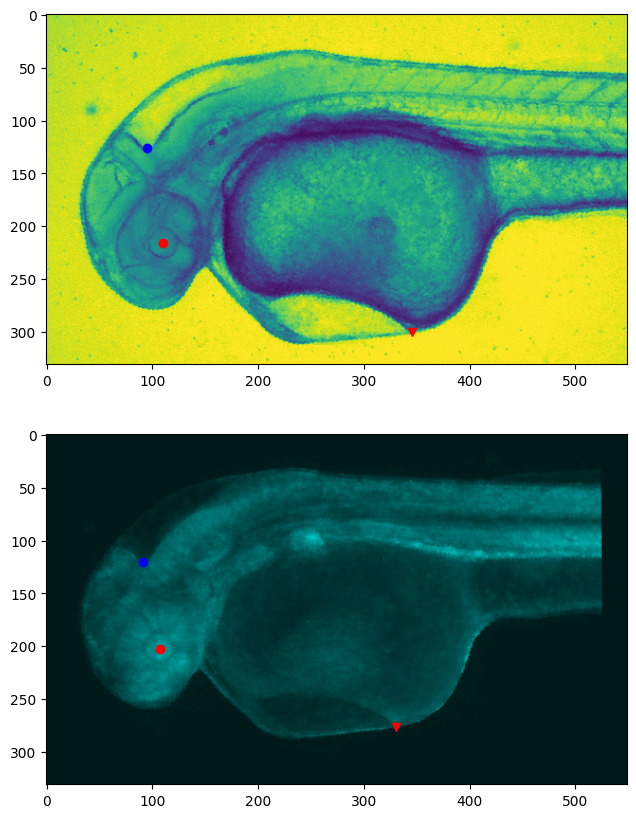

In [14]:
## Extract Keypoints

fig,axes = plt.subplots(2, 1,figsize=(10, 10))

#Fill in the key points array in the form as follows [[x1,y1],[x2,y2],[x3,y3]]
keypointsA = [[110, 216], [95, 126], [346, 300]]
keypointsB = [[107, 203], [91, 120], [330, 276]]

# Display the key points
symbols = ['ro','bo','rv','bv','r+','b+']
ax = axes.ravel()

for i in range(0,len(keypointsA)):
    ax[0].plot(keypointsA[i][0],keypointsA[i][1],symbols[i])
for i in range(0,len(keypointsB)):    
    ax[1].plot(keypointsB[i][0],keypointsB[i][1],symbols[i])

ax[0].imshow(img_vis)
ax[1].imshow(img_cfp)

projection transformation matrix:
 [[ 1.28492350e+00 -3.33373734e-04 -2.38226630e+01]
 [ 1.88764504e-01  1.00544256e+00 -1.51198445e+01]
 [ 7.20031636e-04  8.53297231e-05  1.00000000e+00]]


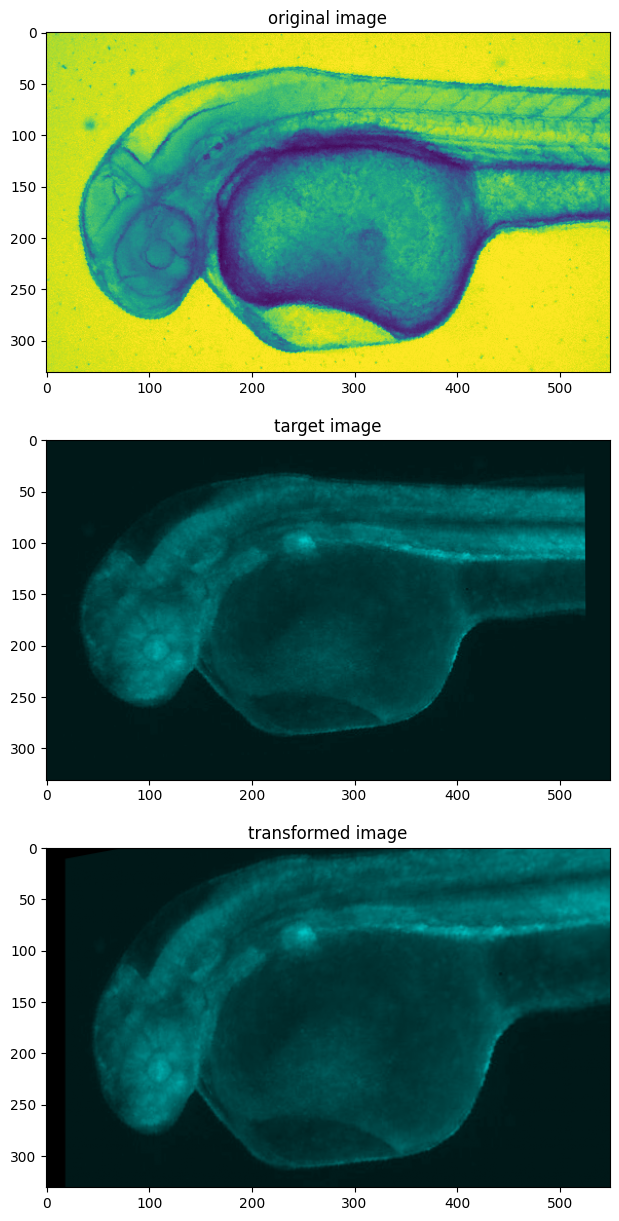

[[221 225 220 ... 235 233 236]
 [222 225 223 ... 234 238 237]
 [224 221 228 ... 240 234 235]
 ...
 [230 231 229 ... 251 239 244]
 [226 237 233 ... 242 249 241]
 [234 234 238 ... 241 239 241]] 
 [[[ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]
  ...
  [ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]]

 [[ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]
  ...
  [ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]]

 [[ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]
  ...
  [ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]]

 ...

 [[ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]
  ...
  [ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]]

 [[ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]
  ...
  [ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]]

 [[ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]
  ...
  [ 0 24 24]
  [ 0 24 24]
  [ 0 24 24]]] 
 [[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.46649744 0.46649744]
  [0.         0.46573675 0.46573675]
  [0.         0.46472103 0.46472103]]

 [[0.         0.         0.        ]
  [0.         0

In [28]:

# Estimate the transform: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py
from skimage.transform import ProjectiveTransform, warp

src = np.array(keypointsA)
dst = np.array(keypointsB)

transform = ProjectiveTransform()
transform.estimate(src, dst)

print("projection transformation matrix:\n", transform.params)

warped_image = warp(img_cfp, inverse_map = transform, output_shape = img_vis.shape)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
titles = ["original image", "target image", "transformed image"]
imgs = [img_vis, img_cfp, warped_image]

for i in range(0, 3):
    axes[i].imshow(imgs[i])
    axes[i].set_title(titles[i])
plt.show()

# Create the overlayed images: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py
print(img_vis, "\n", img_cfp, "\n", warped_image)

# Ouput the overlayed images


##### Question 1: What is the effect of increasing/decreasing the number of chosen control points in registration accuracy?

##### Question 2: How would you evaluate the accuracy of your registration?